In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('polynomial_Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# feature scaling
    apply feature scaling on y too because of huge values along with the features to scale whole dataset

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [7]:
#sc computes mean and sends to standard deviation for one variable x
#so we have to create 2 diff objects for 2 variables

In [8]:
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [9]:
print(sc_x.inverse_transform(x))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# train the model

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x, y)

/home/sayali_karnewar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### transform method is used instead of fit_transform because already fit.

In [12]:
y_pred = svr.predict(sc_x.transform([[6.5]]))  

In [13]:
sc_y.inverse_transform(y_pred)

array([170370.0204065])

In [14]:
#but we don't want the result in the scaled values
#reverse the scale

In [15]:
sc_x.inverse_transform(x)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

# plot

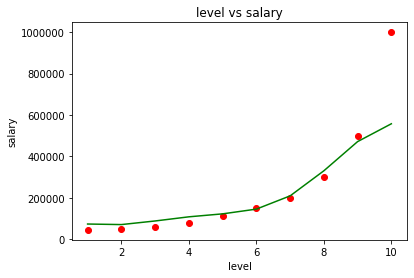

In [16]:
plt.xlabel('level')
plt.ylabel('salary')
plt.title('level vs salary')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svr.predict(x)), color = 'green')
plt.show()

# high resolution curve

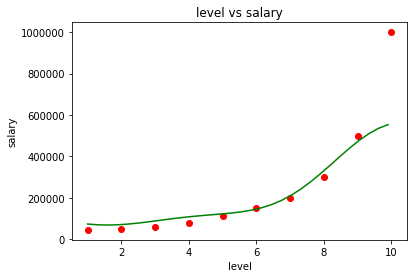

In [20]:
x_grid = np.arange(min(x), max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.xlabel('level')
plt.ylabel('salary')
plt.title('level vs salary')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform(svr.predict(x_grid)), color = 'green')
plt.show()